#### CMSE 201 Final Project (Honors Option)
### &#9989; Josh Wolf
### &#9989; Section_008
#### &#9989; 18 April 2021

# 1 ___The Stephen Curry Effect___

## 1.1 Background and Motivation

Anyone that knows anything about the basketball, knows Stephen Curry has been one of the most influential players the NBA has ever seen. Each year, the league is seeing a higher and higher increase in 3-point shots. Many believe this is the result of Steph Curry's success. Curry has many 3-point records, and since coming into the league 11 years ago has led the league in 3-pointers made SIX times. There is no question Steph is one of the best shooters in NBA history, if not the best. What I will be looking at, is what kind of impact his success has had on the rest of the league.

## 1.2 Methodology

### 1.2.1 Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### 1.2.2 Loading in/Filtering the Data

In the cell below I loaded the data in using pandas. Next I created some filters to include only the columns I want and from the timespan I am interested in. I chose to begin at 1979 because that is when the NBA adopted the 3-point line. I excluded 2012 from the data because the league had a shortened season that year so it would act as an outlier and throw off any models or plots.

In [4]:
data = pd.read_csv("Basketball Data/Seasons_Stats.csv",delimiter=',',skiprows=0,encoding='utf-8') # Loading in data
# Filtering by columns I want to include:
nba= data[["Year", 'Player', 'Pos', 'Age', 'Tm', "G", "MP", 'TS%', 'PER', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', '3PA', '3P', '3P%', 'PTS', 'TRB', 'ORB', 'DRB']]
nba = nba[nba['G'] > 58] # Creating a minimum amount of games played to qualify for season
nba = nba[nba['Year'] >= 1979] # Beginning in 1979
nba = nba[nba['Year'] != 2012] # Excluding 2012
nba.head() # Viewing the first five entries from the dataframe

,Year,Player,Pos,Age,Tm,G,MP,TS%,PER,FG,...,FT,FTA,FT%,3PA,3P,3P%,PTS,TRB,ORB,DRB
5382,1979.0,Kareem Abdul-Jabbar*,C,31.0,LAL,80.0,3157.0,0.612,25.5,777.0,...,349.0,474.0,0.736,NaN,NaN,NaN,1903.0,1025.0,207.0,818.0
5383,1979.0,Tom Abernethy,PF,24.0,GSW,70.0,1219.0,0.550,13.6,176.0,...,70.0,94.0,0.745,NaN,NaN,NaN,422.0,216.0,74.0,142.0
5384,1979.0,Alvan Adams,C,24.0,PHO,77.0,2364.0,0.570,20.4,569.0,...,231.0,289.0,0.799,NaN,NaN,NaN,1369.0,705.0,220.0,485.0
5387,1979.0,Tiny Archibald*,PG,30.0,BOS,69.0,1662.0,0.537,13.1,259.0,...,242.0,307.0,0.788,NaN,NaN,NaN,760.0,103.0,25.0,78.0
5389,1979.0,Dennis Awtrey,C,30.0,TOT,63.0,746.0,0.490,6.7,44.0,...,41.0,56.0,0.732,NaN,NaN,NaN,129.0,151.0,42.0,109.0


### 1.2.3 Calculating Total Shot Attempts

To find total shot attempts, I made two seperate dataframes and grouped by year in each one. Then I found the sum of 2-point attempts and 3-point attempts for each year. I didn't include the index since I didn't really have a use for it.

These dataframes were great to visualize in the next step (1.2.4).

In [9]:
nba2p = nba.groupby('Year', as_index = False)['2PA'].sum() # Calculating two point attempts

nba3p = nba.groupby('Year', as_index = False)['3PA'].sum() # Calculating three point attempts by year

### 1.2.4 Visualizing Overall League Trends

The following code outputs a plot which shows shot attempts in the league. This plot gave me an overall estimate of what direction the league is heading towards. I wanted to look at this before directly measuring how Stephen Curry has made an impact

Text(0.5, 1.0, 'Shot Attempts from 1979-2017')

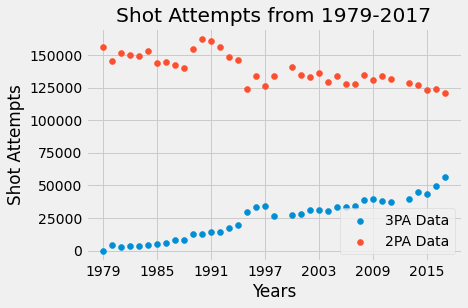

In [10]:
plt.style.use('fivethirtyeight') # Picking a style to use
plt.scatter(nba3p['Year'], nba3p['3PA'], label = '3PA Data') # Plotting 3PA for each year
plt.scatter(nba2p['Year'], nba2p['2PA'], label = '2PA Data') # Plotting 2PA for each year
plt.xticks(np.arange(1979, 2018, step=6))  # Creating the ticks for the x axis so it doesn't look over crowded. I used intervals of 6
plt.legend() # Creating a legend
plt.xlabel('Years') # Creating a x-axis label
plt.ylabel("Shot Attempts") # Creating a y-axis label
plt.title("Shot Attempts from 1979-2017") # Creating a plot title

### 1.2.5 Visualizing Steph Curry's Trends

Now that I was able to look at the overall trends of the entire league, I wanted to focus on Steph Curry's trends. If he really did have an impact on the league, his trends should be much more extreme than the entire league's (which they are).

I did this by creating a new dataframe and filtering for only Curry's stats, then plotting the newly created Curry dataframe.

Text(0.5, 1.0, 'Steph Curry; Shot Attempts by Year')

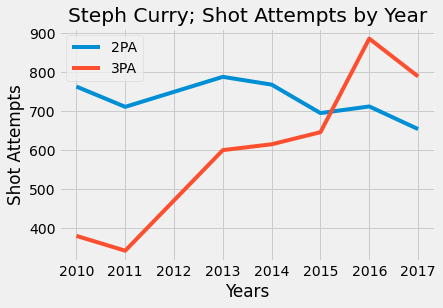

In [12]:
curry = nba[nba['Player'] == 'Stephen Curry'] # New dataframe of just Steph Curry's stats


# Steph Curry Plot:

plt.style.use('fivethirtyeight')
plt.plot(curry['Year'], curry['2PA'], label = "2PA")
plt.plot(curry['Year'], curry['3PA'], label = "3PA")
plt.legend()
plt.xlabel('Years')
plt.ylabel("Shot Attempts")
plt.title("Steph Curry; Shot Attempts by Year")

### 1.2.6 Projecting the League without Curry

The following cell is all about what the league might look like if Steph Curry never existed. I created a new dataframe and used data from 1979 until 2009. I stopped at 2009 because the following year Curry entered the league as a rookie. With this new dataframe, I used PolyFit to model the 3-point and 2-point attempts. Later I will use these models to predict the trend the league would have continued down without Steph Curry.

In [15]:
before_curry = nba[nba['Year'] < 2010] # Creating a new DF that stops before Curry enters the league

before_2p = before_curry.groupby('Year', as_index = False)['2PA'].sum() # Finding sum of 2-point attempts for each season from grouping by year
before_3p = before_curry.groupby('Year', as_index = False)['3PA'].sum() # Finding sum of 3-point attempts for each season from grouping by year

# Creating a 3rd degree PolyFit model to follow 2-point attempts
before2p_model = np.polyfit(before_2p['Year'], before_2p['2PA'], 3) 
b2p_line = np.poly1d(before2p_model)

# Creating a 3rd degree PolyFit model to follow 3-point attempts
before3p_model = np.polyfit(before_3p['Year'], before_3p['3PA'], 3) 
b3p_line = np.poly1d(before3p_model)

### 1.2.7 Visualizing the League Before Curry

The next cell shows a plot of the best fit models created in the code above. The plot stops at 2009 because that is the final year the NBA was without Steph Curry.

Text(0.5, 1.0, 'The League Before Steph Curry')

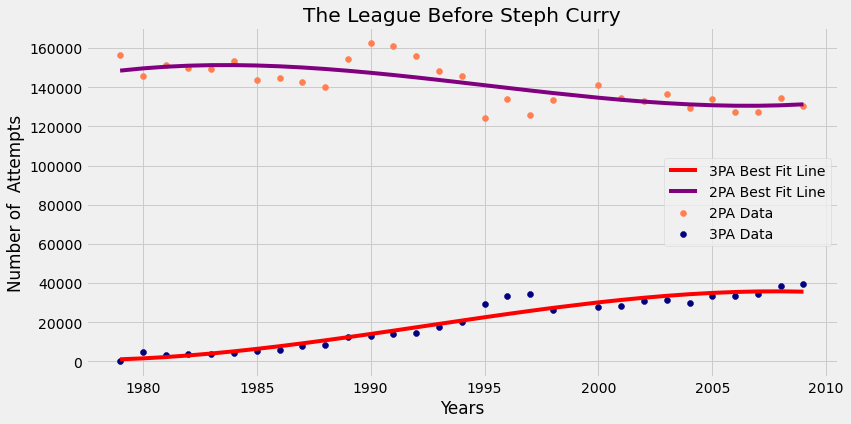

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.scatter(before_2p['Year'], before_2p['2PA'], label = "2PA Data", c = "coral")
plt.scatter(before_3p['Year'], before_3p['3PA'], label = "3PA Data", c = "navy")
plt.plot(before_3p['Year'], b3p_line(before_3p['Year']), label = "3PA Best Fit Line", c = 'red')
plt.plot(before_2p['Year'], b2p_line(before_2p['Year']), label = '2PA Best Fit Line', c = 'purple')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Number of  Attempts")
plt.title("The League Before Steph Curry")

### 1.2.8 The Stephen Curry Effect

This next plot is very important. In this plot I show the model created from data *before* Curry entered the league, and I use that model to *predict* what the league would have looked like if Curry never got drafted. I overlay the model with the actual data of the years Steph was in the league. There is a clear contrast between the trend that was predicted to happen, and what actually happened. I will expand more on this in the "Results" section.

Text(0.5, 1.0, 'The Stephen Curry Effect')

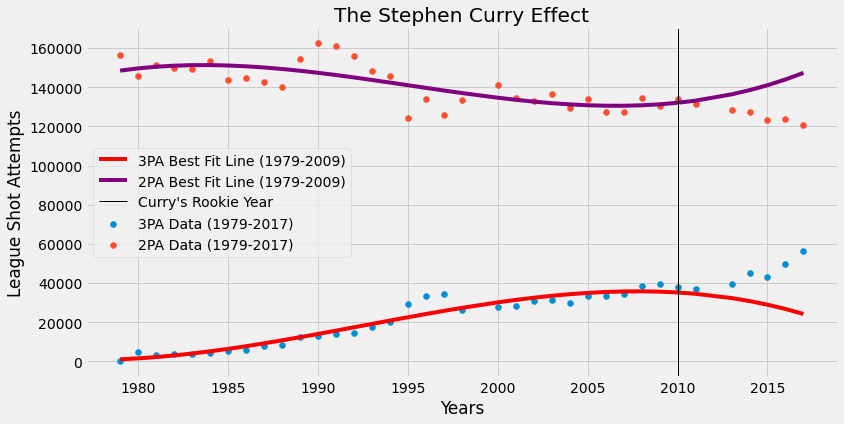

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.scatter(nba3p['Year'], nba3p['3PA'], label = '3PA Data (1979-2017)') # Plotting the actual 3PA data
plt.scatter(nba2p['Year'], nba2p['2PA'], label = '2PA Data (1979-2017)') # Plotting the actual 2PA data
plt.plot(nba3p['Year'], b3p_line(nba3p['Year']), label = "3PA Best Fit Line (1979-2009)", c = 'red') # Plotting the 3PA Model
plt.plot(nba2p['Year'], b2p_line(nba2p['Year']), label = '2PA Best Fit Line (1979-2009)', c = 'purple') # Plotting the 2PA Model
plt.axvline((2010),linewidth=1, color='black', label = "Curry's Rookie Year") # Creating a vertical line at Curry's Rookie Year (2010)
plt.legend(loc = 6) # Adding a legend and changing its location
plt.xlabel("Years") # x-axis label
plt.ylabel("League Shot Attempts") # y-axis label
plt.title("The Stephen Curry Effect") # Plot Title 

### 1.2.9 Impact by Position

Next I wanted to look at what the impact on each position was, in terms of 3-point attempts. I created five different dataframes (1 for each position) and grouped by year to find total 3-point attempts for each year. 

In [21]:
pf = nba[nba["Pos"] == 'PF'] # Filtering a new DF for the Power Forward position
pf3p = pf.groupby('Year', as_index = False)['3PA'].sum()


pg = nba[nba["Pos"] == 'PG'] # Filtering a new DF for the Point Guard position
pg3p = pg.groupby('Year', as_index = False)['3PA'].sum()


sg = nba[nba["Pos"] == 'SG'] # Filtering a new DF for the Shooting Guard position
sg3p = sg.groupby('Year', as_index = False)['3PA'].sum()

sf = nba[nba["Pos"] == 'SF'] # Filtering a new DF for the Small Forward position
sf3p = sf.groupby('Year', as_index = False)['3PA'].sum()

c = nba[nba["Pos"] == 'C'] # Filtering a new DF for the Center position
c3p = c.groupby('Year', as_index = False)['3PA'].sum()


### 1.2.10 Visualizing the Trends for each Position

With this plot, I showed the overall 3-point attempt trend for each position. I left a mark showing where Curry entered the league, to see any drastic changes from that point. Later in the report I will further analyze these trends.

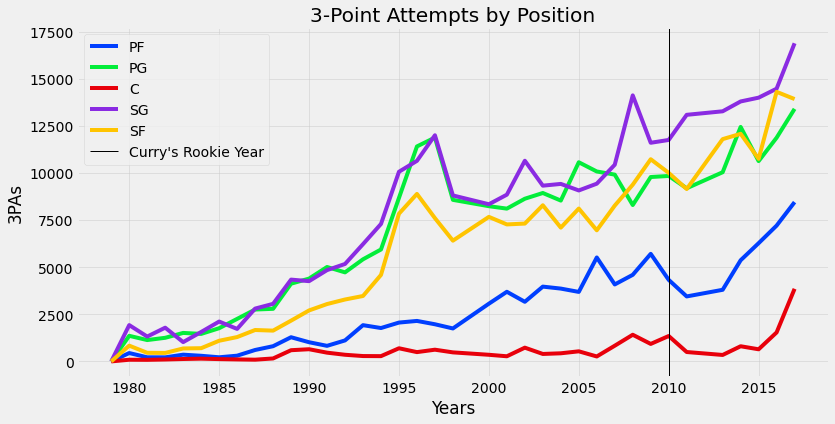

In [23]:
plt.style.use('seaborn-bright')
plt.figure(figsize = (12,6))
plt.xlabel('Years')
plt.ylabel("3PAs")
plt.title('3-Point Attempts by Position')
plt.grid(alpha = .5)
plt.plot(pf3p['Year'], pf3p['3PA'], label = "PF")
plt.plot(pg3p['Year'], pg3p['3PA'], label = "PG")
plt.plot(c3p['Year'], c3p['3PA'], label = "C")
plt.plot(sg3p['Year'], sg3p['3PA'], label = "SG")
plt.plot(sf3p['Year'], sf3p['3PA'], label = "SF")
plt.axvline((2010),linewidth=1, color='black', label = "Curry's Rookie Year")
plt.legend()

### 1.2.11 Finding the 3PA Ratio Increase by Position

In the following code I created 5 different ratios of 3-point attempts, one for each position. The ratios were created by taking the final year of the data (2017) and dividing it by the year Steph Curry entered the league (2010). I found these data entries by using .iloc[]. Once the five ratios were created, I made a list with each entry including the position abbreviation and its respective ratio. Then I converted this list into a dataframe so I would be able to plot it. The last step was to sort the values in ascending order which I knew would help with visualization purposes.

In [24]:
c_ratio = c3p.iloc[36, 1] / c3p.iloc[30, 1] # Creating the 3PA ratio for Centers
sf_ratio = sf3p.iloc[36, 1] / sf3p.iloc[30, 1] # Creating the 3PA ratio for Small Forwards
sg_ratio = sg3p.iloc[36, 1] / sg3p.iloc[30, 1] # Creating the 3PA ratio for Shooting Guards
pg_ratio = pg3p.iloc[36, 1] / pg3p.iloc[30, 1] # Creating the 3PA ratio for Point Guards
pf_ratio = pf3p.iloc[36, 1] / pf3p.iloc[30, 1] # Creating the 3PA ratio for Power Forwards

# Creating a list with the position abbreviation and ratio:
positional_ratios = [('C', c_ratio), ('SF', sf_ratio), ('SG', sg_ratio), ('PG', pg_ratio), ('PF', pf_ratio)]

# Converting the list to a dataframe
ratios_df = pd.DataFrame(positional_ratios,columns=['Position', 'Ratio'])
ratios = ratios_df.sort_values('Ratio') # Sorting by ascending order

### 1.2.12 Visualizing 3PA Ratios by Position

After I created the dataframe with the ratios for each position, I plotted them in a bar graph. I found a cool way to show the data above it's respective bar as well. This code (Lines 5 & 6) came from StackOverflow which I have referenced at the bottom.

Text(0.5, 0, 'Position')

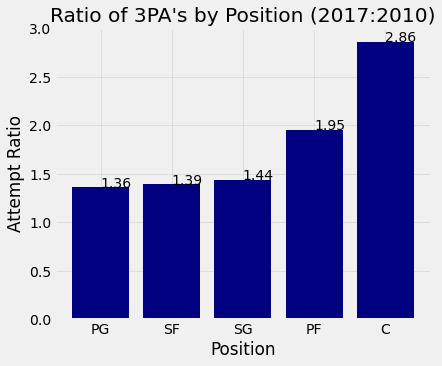

In [31]:
plt.style.use('seaborn-bright') # Seaborn Bright Style for Plot
plt.figure(figsize = (6, 5)) # Setting the figure size 
plt.grid(alpha = .5) # Creating a grid
plt.bar(ratios['Position'], ratios['Ratio'], color = 'navy') # Plotting the position and it's respective ratio
for a,b in zip(ratios['Position'], ratios['Ratio']): # This plots the value of each bar above and rounds to 2 decimals
    plt.text(a, b, round((float(b)), 2))
plt.title("Ratio of 3PA's by Position (2017:2010)") # Plot Title 
plt.ylabel("Attempt Ratio") # Plot Y axis label
plt.xlabel("Position") # Plot x axis label



### 1.2.13 Impact on Rebounds

The following cell is creating a new dataframe that only includes rebounding variables. I chose to look at rebounding numbers because if there are more long range shots in recent years, I think that would have an effect on offensive vs. defensive rebounds. The reason behind this is that if teams are having more players shoot 3s, there are less guys under the hoop to try and rebound. My prediction is that this will result in less offensive rebounds and more defensive rebounds as 3-point attempts increase.

In [33]:
rebounds = nba.groupby('Year', as_index = False)['TRB', 'ORB', 'DRB'].sum() # Creating a new dataframe that groups by year and sums total rebounds, offensive rebounds, and defensive rebounds
rebounds = rebounds[rebounds['Year'] > 2009] # Setting the dataset from the time Curry entered the league (2010-present)
rebounds.head() # Viewing the first five entries of the DF

<ipython-input-33-068a63fdeecb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rebounds = nba.groupby('Year', as_index = False)['TRB', 'ORB', 'DRB'].sum() # Creating a new dataframe that groups by year and sums total rebounds, offensive rebounds, and defensive rebounds


,Year,TRB,ORB,DRB
30,2010.0,86160.0,22192.0,63968.0
31,2011.0,83501.0,21500.0,62001.0
32,2013.0,85692.0,22761.0,62931.0
33,2014.0,86256.0,21527.0,64729.0
34,2015.0,86692.0,21769.0,64923.0


### 1.2.14 PolyFit Models and Visualizing Rebound Trends

After making the rebound dataframe, I created PolyFit models which would help me visualize the rebound trends. The models are shown below before the code for the plots. These models help show that the increse in 3-point attempts has a clear impact on rebounding numbers.

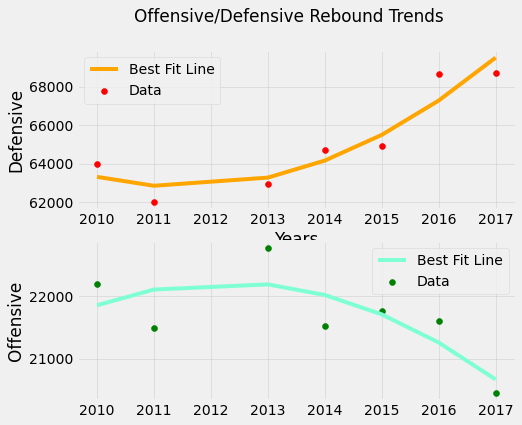

In [35]:
offmodel = np.polyfit(rebounds['Year'], rebounds['ORB'], 2)
offline = np.poly1d(offmodel)

defmodel = np.polyfit(rebounds['Year'], rebounds['DRB'], 2)
defline = np.poly1d(defmodel)

plt.style.use('seaborn-bright')
plt.figure(figsize = (7,6))
plt.subplot(211)
plt.scatter(rebounds['Year'], rebounds['DRB'], label = "Data", c = 'r')
plt.plot(rebounds['Year'], defline(rebounds['Year']), label = "Best Fit Line", c = 'orange')
plt.grid(alpha = .5)
plt.xlabel("Years")
plt.ylabel("Defensive")
plt.legend()
plt.subplot(212)
plt.suptitle("Offensive/Defensive Rebound Trends")
plt.scatter(rebounds['Year'], rebounds['ORB'], label = "Data", c = 'g')
plt.plot(rebounds['Year'], offline(rebounds['Year']), label = "Best Fit Line", c = 'aquamarine')
plt.grid(alpha = .5)
plt.ylabel("Offensive")
plt.legend()


### 1.2.15 Impact on League Efficieny

With the increase in shooting, I was interested in what kind of effect this had on efficiency numbers throughout the league. I decided to look at four different variables: Player Efficiency Rating, Total Shooting Percentage, Estimated Field Goal Percentage, and scoring. 

The following code created a dataframe for the efficiency variables and a dataframe for scoring. In the efficiency dataframe, I grouped by year, and found the mean of each variable. I had to give scoring it's own dataframe becuase it made more sense to look at total scoring rather than mean scoring.

When looking at efficiency, I decided to start from 2000.

In [37]:
efficiency = nba[['Year', 'PER', 'TS%', 'eFG%']] # Choosing the variables to select for the new dataframe
efficiency = efficiency[efficiency['Year'] > 2000] # Starting from 2000
efficiency = efficiency.groupby('Year', as_index = False)['PER', 'TS%', 'eFG%'].mean() # Grouping by year and finding the mean for each variable

scoring = nba[['Year', 'PTS']] # Creating the scoring DF
scoring = scoring[scoring['Year'] > 2000] # Starting at 2000
scoring = scoring.groupby('Year', as_index = False)['PTS'].sum() # Finding the total scoring for each year

<ipython-input-37-8b768cf9ff37>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  efficiency = efficiency.groupby('Year', as_index = False)['PER', 'TS%', 'eFG%'].mean() # Grouping by year and finding the mean for each variable


### 1.2.16 PolyFit Models and Visualizing Efficiency Trends

The next chunk of code contains the four PolyFit models I created (1 for each variable) and the subplots. In the subplots, I used the best fit line for each model and plotted it over the data. I wanted to see the general trends for each variable to make an assessment on overall league efficiency.

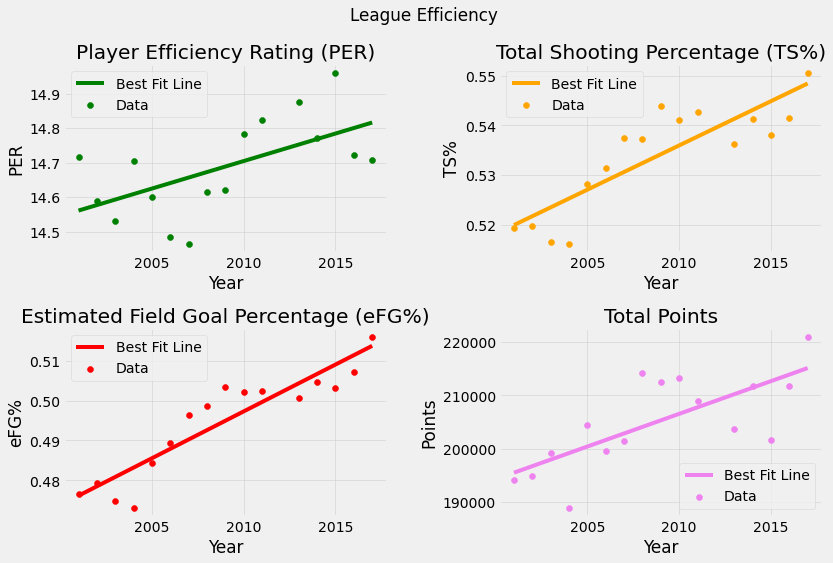

In [38]:
permodel = np.polyfit(efficiency['Year'], efficiency['PER'], 1)
perline = np.poly1d(permodel)

tsmodel = np.polyfit(efficiency['Year'], efficiency['TS%'], 1)
tsline = np.poly1d(tsmodel)

efgmodel = np.polyfit(efficiency['Year'], efficiency['eFG%'], 1)
efgline = np.poly1d(efgmodel)

scoringmodel = np.polyfit(scoring['Year'], scoring['PTS'], 1)
scoringline = np.poly1d(scoringmodel)


plt.figure(figsize = (12,8))
plt.suptitle('League Efficiency')
plt.xlabel('Year')
plt.subplot(221)
plt.title('Player Efficiency Rating (PER)')
plt.xlabel('Year')
plt.ylabel('PER')
plt.scatter(efficiency['Year'], efficiency['PER'], c = 'green', label = "Data")
plt.plot(efficiency['Year'], perline(efficiency['Year']), c = 'green', label = 'Best Fit Line')
plt.legend()
plt.grid(alpha = .5)

plt.subplot(222)
plt.scatter(efficiency['Year'], efficiency['TS%'], c = 'orange', label = "Data")
plt.plot(efficiency['Year'], tsline(efficiency['Year']), c = 'orange', label = 'Best Fit Line')
plt.title("Total Shooting Percentage (TS%)")
plt.xlabel('Year')
plt.ylabel('TS%')
plt.legend()
plt.grid(alpha = .5)

plt.subplot(223)
plt.scatter(efficiency['Year'], efficiency['eFG%'], c = 'red', label = "Data")
plt.plot(efficiency['Year'], efgline(efficiency['Year']), c = 'red', label = 'Best Fit Line')
plt.title("Estimated Field Goal Percentage (eFG%)")
plt.xlabel('Year')
plt.ylabel('eFG%')
plt.legend()
plt.grid(alpha = .5)

plt.subplot(224)
plt.grid(alpha = .5)
plt.scatter(scoring['Year'], scoring['PTS'], c = 'violet', label = "Data")
plt.plot(scoring['Year'], scoringline(scoring['Year']), c = 'violet', label = 'Best Fit Line')
plt.title("Total Points")
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend()
plt.tight_layout()

## 1.3 Results

### 1.3.1 Steph Curry's Shot Attempt Chart

After analyzing the models and figures, it is clear that Steph Curry had an instrumental effect on the league. First off, it can be seen from Curry's solo shot attempt chart that his method of scoring is far different than the norm. Not only are his 3-point numbers are closer overall to his 2-point numbers, he actually has two years where he shot *more* 3s than 2s. 

Text(0.5, 1.0, 'Steph Curry; Shot Attempts by Year')

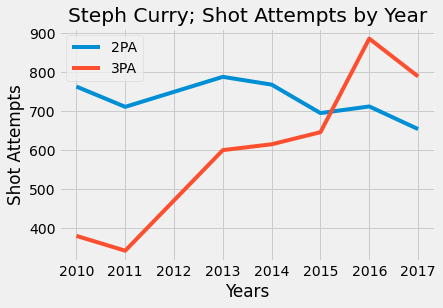

In [39]:
plt.style.use('fivethirtyeight')
plt.plot(curry['Year'], curry['2PA'], label = "2PA")
plt.plot(curry['Year'], curry['3PA'], label = "3PA")
plt.legend()
plt.xlabel('Years')
plt.ylabel("Shot Attempts")
plt.title("Steph Curry; Shot Attempts by Year")

### 1.3.2 Curry's Effect on the League

The plot shown below illustrates that the league's increase in 3-point attempts were on pace to cool off had Curry never entered the league. In fact, the model predicts that 2-point attempts actually would have began to increase again (and 3-point attempts to decrease). However, once you cross the line showing Curry's rookie year, the data begins to deviate far from the model and trends in the oppositie direction. A strong inference can be made that players and coaches saw the success of Curry's method and begin implementing it themselves, to a degree. 

Text(0.5, 1.0, 'The Stephen Curry Effect')

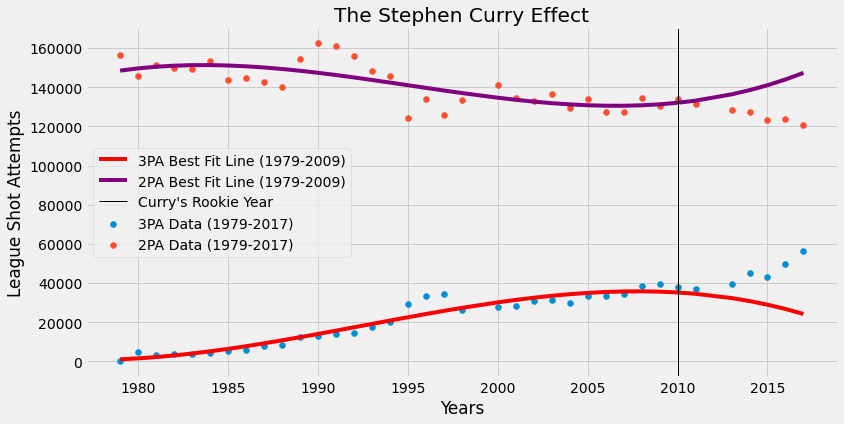

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.scatter(nba3p['Year'], nba3p['3PA'], label = '3PA Data (1979-2017)') # Plotting the actual 3PA data
plt.scatter(nba2p['Year'], nba2p['2PA'], label = '2PA Data (1979-2017)') # Plotting the actual 2PA data
plt.plot(nba3p['Year'], b3p_line(nba3p['Year']), label = "3PA Best Fit Line (1979-2009)", c = 'red') # Plotting the 3PA Model
plt.plot(nba2p['Year'], b2p_line(nba2p['Year']), label = '2PA Best Fit Line (1979-2009)', c = 'purple') # Plotting the 2PA Model
plt.axvline((2010),linewidth=1, color='black', label = "Curry's Rookie Year") # Creating a vertical line at Curry's Rookie Year (2010)
plt.legend(loc = 6) # Adding a legend and changing its location
plt.xlabel("Years") # x-axis label
plt.ylabel("League Shot Attempts") # y-axis label
plt.title("The Stephen Curry Effect") # Plot Title 

### 1.3.3 Curry's Effect on other Positions

Now that I have established Steph's effect on the league, I want to dive into how each position is affected. From the plots below, it can be seen that every position has seen a large increase in 3-point attempts since Curry entered the league. The ratio plot shows that the Power Forward and Center positions have seen the largest jump, therefore they have had the biggest effect from Curry entering the league. Power Forwards are shooting almost double the amount of 3-pointers, while centers are shooting almost triple the amount. This is probably due to a combination of factors. One being scouts now actively looking for players at these positions to possess a positive jump shot. Another reason is the players themselves becoming more versatile and adding the 3-pointer to their toolbox.

Thanks to Steph Curry, everyone has seen what a good 3-point shot can do for their game. And now everyone is becoming a shooter because of it.

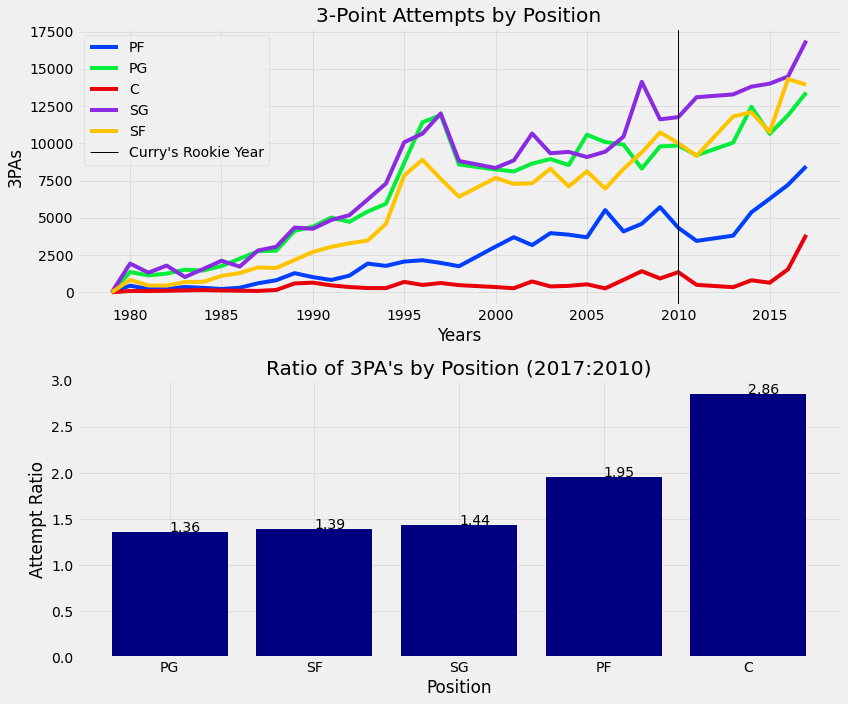

In [45]:
plt.style.use('seaborn-bright')
plt.figure(figsize = (12,10))
plt.subplot(211)
plt.xlabel('Years')
plt.ylabel("3PAs")
plt.title('3-Point Attempts by Position')
plt.grid(alpha = .5)
plt.plot(pf3p['Year'], pf3p['3PA'], label = "PF")
plt.plot(pg3p['Year'], pg3p['3PA'], label = "PG")
plt.plot(c3p['Year'], c3p['3PA'], label = "C")
plt.plot(sg3p['Year'], sg3p['3PA'], label = "SG")
plt.plot(sf3p['Year'], sf3p['3PA'], label = "SF")
plt.axvline((2010),linewidth=1, color='black', label = "Curry's Rookie Year")
plt.legend()

plt.style.use('seaborn-bright') # Seaborn Bright Style for Plot
plt.subplot(212)
plt.grid(alpha = .5) # Creating a grid
plt.bar(ratios['Position'], ratios['Ratio'], color = 'navy') # Plotting the position and it's respective ratio
for a,b in zip(ratios['Position'], ratios['Ratio']): # This plots the value of each bar above and rounds to 2 decimals
    plt.text(a, b, round((float(b)), 2))
plt.title("Ratio of 3PA's by Position (2017:2010)") # Plot Title 
plt.ylabel("Attempt Ratio") # Plot Y axis label
plt.xlabel("Position") # Plot x axis label
plt.tight_layout()

### 1.3.4 What an Increase in Shooting is Doing to Rebounds

With an increase in 3-point shot attempts, there is an impact on rebounding numbers. As the graphs below display, offensive rebounding is on the decline, while defensive rebounding is on the rise. This is an after effect I saw coming. Since more positions are shooting the 3-pointer (explained in cells above), the result is the floor opens up. There are less guys crowded under the basket, and more guys spread accross the perimeter, aka the 3-point line. Now when a shot goes up it is much easier for the defense to grab the rebound, since there are less bodies to account for under the hoop. 

These rebounding trends can be seen as a direct result from the increse in shooting attempts, specifically by forwards and centers.

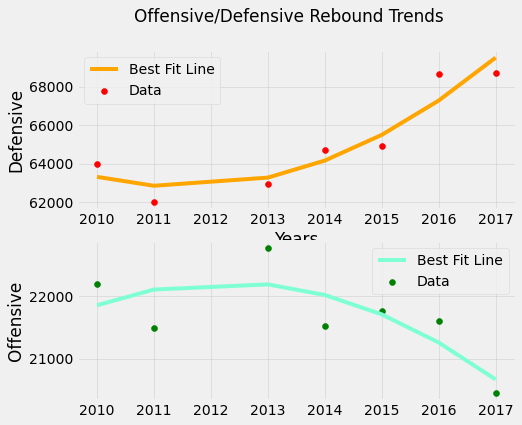

In [46]:
plt.style.use('seaborn-bright')
plt.figure(figsize = (7,6))
plt.subplot(211)
plt.scatter(rebounds['Year'], rebounds['DRB'], label = "Data", c = 'r')
plt.plot(rebounds['Year'], defline(rebounds['Year']), label = "Best Fit Line", c = 'orange')
plt.grid(alpha = .5)
plt.xlabel("Years")
plt.ylabel("Defensive")
plt.legend()
plt.subplot(212)
plt.suptitle("Offensive/Defensive Rebound Trends")
plt.scatter(rebounds['Year'], rebounds['ORB'], label = "Data", c = 'g')
plt.plot(rebounds['Year'], offline(rebounds['Year']), label = "Best Fit Line", c = 'aquamarine')
plt.grid(alpha = .5)
plt.ylabel("Offensive")
plt.legend()

### 1.3.5 League Efficiency

The last thing to look at is efficiency. We know that players are shooting more 3s, but is it actually worth it? This subplot I created shows that the increase in shooting is indeed more efficient for the game. All four variables I analyzed have positive trends, and don't seem to be slowing down anytime soon. Scoring is up, shooting percentages are up, and player efficiencly is up. 

After viewing these plots, it is easy for me to say that the league has become more efficient as a result of the shooting increase.

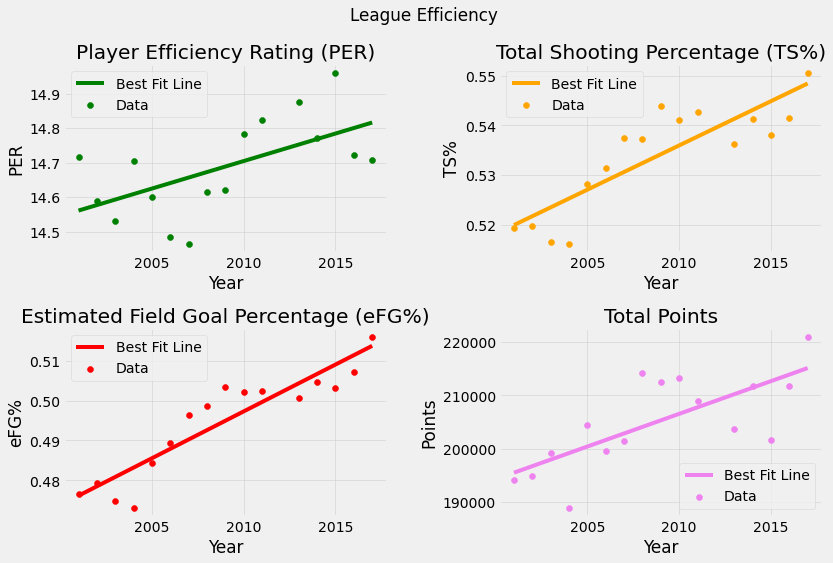

In [47]:
plt.figure(figsize = (12,8))
plt.suptitle('League Efficiency')
plt.xlabel('Year')
plt.subplot(221)
plt.title('Player Efficiency Rating (PER)')
plt.xlabel('Year')
plt.ylabel('PER')
plt.scatter(efficiency['Year'], efficiency['PER'], c = 'green', label = "Data")
plt.plot(efficiency['Year'], perline(efficiency['Year']), c = 'green', label = 'Best Fit Line')
plt.legend()
plt.grid(alpha = .5)

plt.subplot(222)
plt.scatter(efficiency['Year'], efficiency['TS%'], c = 'orange', label = "Data")
plt.plot(efficiency['Year'], tsline(efficiency['Year']), c = 'orange', label = 'Best Fit Line')
plt.title("Total Shooting Percentage (TS%)")
plt.xlabel('Year')
plt.ylabel('TS%')
plt.legend()
plt.grid(alpha = .5)

plt.subplot(223)
plt.scatter(efficiency['Year'], efficiency['eFG%'], c = 'red', label = "Data")
plt.plot(efficiency['Year'], efgline(efficiency['Year']), c = 'red', label = 'Best Fit Line')
plt.title("Estimated Field Goal Percentage (eFG%)")
plt.xlabel('Year')
plt.ylabel('eFG%')
plt.legend()
plt.grid(alpha = .5)

plt.subplot(224)
plt.grid(alpha = .5)
plt.scatter(scoring['Year'], scoring['PTS'], c = 'violet', label = "Data")
plt.plot(scoring['Year'], scoringline(scoring['Year']), c = 'violet', label = 'Best Fit Line')
plt.title("Total Points")
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend()
plt.tight_layout()

## 1.4 Synthesis and Discussion

From my results, I learned that Steph Curry had a major effect on the NBA on multiple facets of the game. Obviously 3-point attempts and 2-point attempts being the greatest. 3-pointers are increasing at an all time rate since he entered the league, and 2-pointers are declining year after year. 

Power forwards and centers are the positions that have been impacted the most, with 3-point shooting increases of 95% and 186% respectively. Also, Offensive and Defensive rebounds are trending in opposite directions in the wake of this shooting increase. As well as efficiency numbers increasing accross the board.  

When completing this project, I did run into a couple obstacles. My main obstacle was that the data only went up to 2017. I was still able to accomplish what I set out for, but the results would have been much more conclusive if I had data going back to the last full season. That would have given me an entire decade to see the trends since Curry entered the league. Another issue I had was trying to quantify the actual effect Curry had. I had trouble thinking of ways to calculate numbers to prove his effect, so I had to base everything solely of the plots I made.

If I did this project again, one thing I would do differently is try and predict the future of the league's shot attempts using a curve_fit model. I didn't really think of this idea until I was almost done with my project, and by then it was too late to get started. 

## 1.5 References

Brunet, Charles, et al. “Writing Numerical Values on the Plot with Matplotlib.” Stack Overflow, 1 Mar. 1960, stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib. 

Goldstein, Omri. “NBA Players Stats since 1950.” Kaggle, 27 Apr. 2018, www.kaggle.com/drgilermo/nba-players-stats.

M, Jacob, and Alexander McFarlane. “How to Set a Single, Main Title above All the Subplots with Pyplot?” Stack Overflow, 1 May 1960, stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot. 

“Pandas.DataFrame.merge¶.” Pandas.DataFrame.merge - Pandas 1.2.4 Documentation, pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html. 